In [ ]:
from IPython.core.debugger import set_trace
import yfinance as yf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

%matplotlib inline


In [ ]:
df=pd.read_csv('MSFT.csv')
df.tail()

,date,open,high,low,close,volume
9739,2024-11-04,409.80,410.415,405.5713,408.46,19308950
9740,2024-11-05,408.37,414.900,408.0800,411.46,17437067
9741,2024-11-06,412.42,420.450,410.5200,420.18,26848000
9742,2024-11-07,421.28,426.850,419.8800,425.43,19619533
9743,2024-11-08,425.32,426.500,421.7800,422.54,16688787


In [ ]:
df=df['close'].copy()

df

,close
0,0.0603
1,0.0624
2,0.0635
3,0.0619
4,0.0608
...,...
9739,408.4600
9740,411.4600
9741,420.1800
9742,425.4300


In [ ]:
df.describe()

,close
count,9744.000000
mean,55.491829
std,95.037918
min,0.056000
25%,3.601475
50%,19.299250
75%,39.671375
max,466.728600


In [ ]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 4.769868
p-value: 1.000000


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(df)
ax1.set_title('Original Series')
plot_acf(df,ax=ax2)
plt.show()


In [ ]:
diff=df.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title('Differenced Series')
plot_acf(diff,ax=ax2)
plt.show()

In [ ]:
diff=df.diff().diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title('Differenced Series')
plot_acf(diff,ax=ax2)
plt.show()

In [ ]:
!pip install pmdarima
from pmdarima.arima.utils import ndiffs


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.8 MB/s eta 0:00:00


In [ ]:
ndiffs(df,test="adf")

1

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

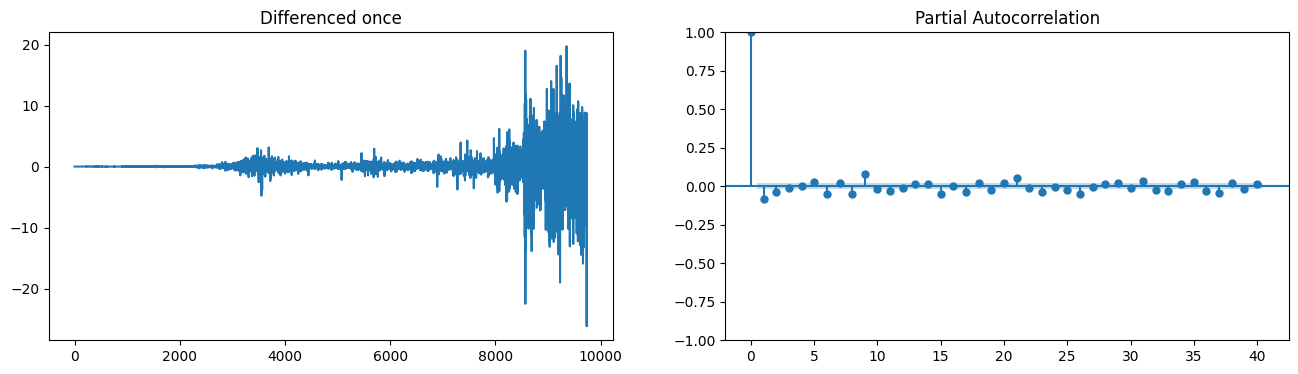

In [ ]:
diff=df.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title('Differenced once')
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);
#4579

p=7

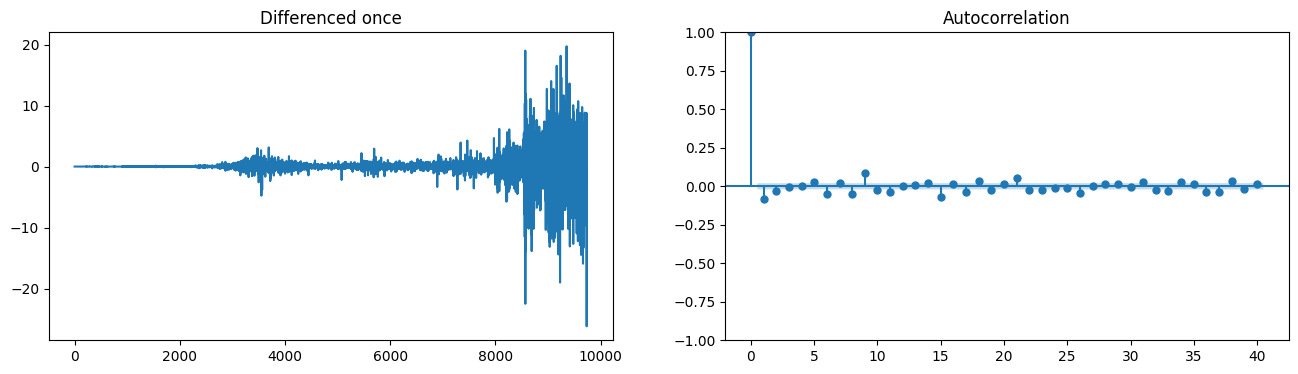

In [ ]:
diff=df.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title('Differenced once')
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

q=2

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df,order=(9,1,5))
model_fit=model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 9744
Model:                 ARIMA(9, 1, 5)   Log Likelihood              -19358.659
Date:                Sun, 17 Nov 2024   AIC                          38747.318
Time:                        16:07:05   BIC                          38855.083
Sample:                             0   HQIC                         38783.843
                               - 9744                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6792      0.202     -3.366      0.001      -1.075      -0.284
ar.L2         -0.3735      0.267     -1.397      0.163      -0.898       0.151
ar.L3         -0.0657      0.271     -0.243      0.8

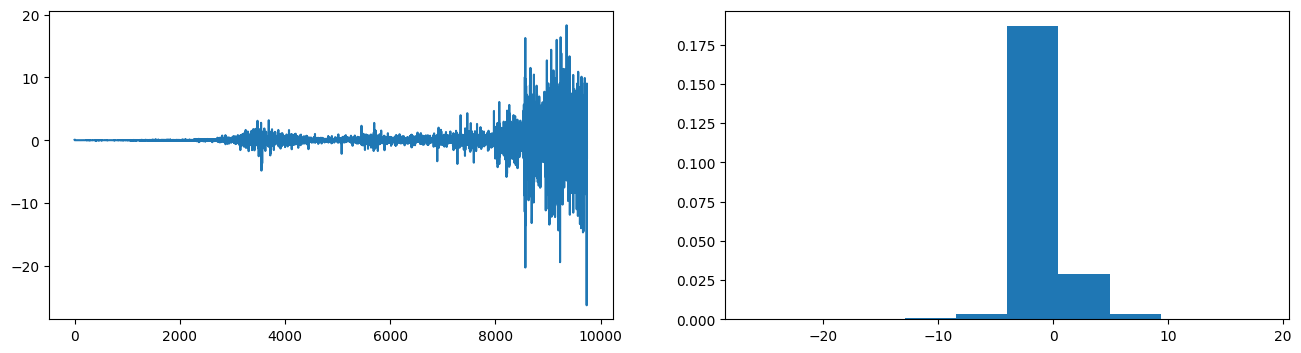

In [ ]:
residuals=pd.DataFrame(model_fit.resid)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals,density=True)
plt.show()

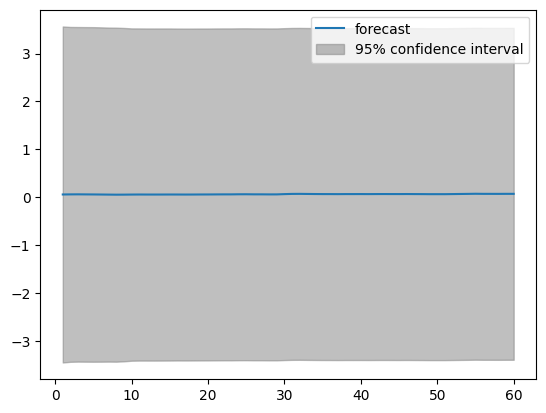

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(result=model_fit,start=1,end=60,dynamic=False);

In [ ]:
n=int(len(df)*0.8)
train=df[:n]
test=df[n:]
print(test)
print

6820     23.6903
6821     23.4929
6822     23.5217
6823     23.6081
6824     23.5176
          ...   
9739    408.4600
9740    411.4600
9741    420.1800
9742    425.4300
9743    422.5400
Name: close, Length: 2924, dtype: float64
0        0.0603
1        0.0624
2        0.0635
3        0.0619
4        0.0608
         ...   
6815    23.1639
6816    23.1597
6817    23.3366
6818    23.5299
6819    23.5340
Name: close, Length: 6820, dtype: float64


In [ ]:
model=ARIMA(train,order=(9,1,9))
result=model.fit()
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 6820
Model:                 ARIMA(9, 1, 9)   Log Likelihood               -1903.513
Date:                Sun, 17 Nov 2024   AIC                           3845.026
Time:                        16:30:41   BIC                           3974.748
Sample:                             0   HQIC                          3889.785
                               - 6820                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4822      0.119      4.051      0.000       0.249       0.715
ar.L2          0.4270      0.137      3.111      0.002       0.158       0.696
ar.L3         -0.5475      0.123     -4.458      0.0

In [ ]:
step=500
fc=result.forecast(steps=step)
forecast_result=result.get_forecast()
ci=forecast_result.conf_int()
print("FC",fc)
print(ci)
result.summary()

FC 6820    23.524194
6821    23.505570
6822    23.509162
6823    23.506467
6824    23.529039
          ...    
7315    23.579845
7316    23.580072
7317    23.579586
7318    23.580169
7319    23.579683
Name: predicted_mean, Length: 500, dtype: float64
      lower close  upper close
6820    22.896897     24.15149


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 6820
Model:                 ARIMA(9, 1, 9)   Log Likelihood               -1903.513
Date:                Sun, 17 Nov 2024   AIC                           3845.026
Time:                        16:32:29   BIC                           3974.748
Sample:                             0   HQIC                          3889.785
                               - 6820                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4822      0.119      4.051      0.000       0.249       0.715
ar.L2          0.4270      0.137      3.111      0.002       0.158       0.696
ar.L3         -0.5475      0.123     -4.458      0.000      -0.788      -0.307
ar.L4          0.1325      0.108      1.222      0.222      -0.080       0.345
ar.L5          0.5837      0.079      7.395      0.000       0.429       0.738
ar.L6         -0.4956      0.113     -4.398      0.000      -0.716      -0.275
ar.L7          0.0871      0.108      0.805      0.421      -0.125       0.299
ar.L8          0.3393      0.081      4.194      0.000       0.181       0.498
ar.L9         -0.6048      0.069     -8.719      0.000      -0.741      -0.469
ma.L1         -0.5102      0.119     -4.277      0.000      -0.744      -0.276
ma.L2         -0.4043      0.139     -2.906      0.004      -0.677      -0.132
ma.L3          0.5256      0.124      4.253      0.000       0.283       0.768
ma.L4         -0.1691      0.104     -1.634      0.102      -0.372       0.034
ma.L5         -0.5341      0.076     -7.033      0.000      -0.683      -0.385
ma.L6          0.5297      0.106      5.017      0.000       0.323       0.737
ma.L7         -0.1232      0.107     -1.150      0.250      -0.333       0.087
ma.L8         -0.3209      0.084     -3.834      0.000      -0.485      -0.157
ma.L9          0.6180      0.070      8.778      0.000       0.480       0.756
sigma2         0.1024      0.001    151.817      0.000       0.101       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):             97205.48
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):             214.27   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#fc=pd.Series(fc,index=test[:step].index)
lower=pd.Series(ci.iloc[:,0],index=test[:step].index)
upper=pd.Series(ci.iloc[:,1],index=test[:step].index)

print(test[:step])
fc


6820    23.6903
6821    23.4929
6822    23.5217
6823    23.6081
6824    23.5176
6825    24.3566
6826    24.9077
6827    23.8014
6828    23.6821
6829    23.5998
6830    23.8301
6831    23.7109
6832    23.6821
6833    24.4841
6834    25.3601
6835    25.1710
6836    26.1251
6837    26.2732
6838    26.1498
6839    26.8243
6840    27.2274
6841    26.9148
6842    27.2768
6843    27.5482
6844    27.7621
6845    27.4001
6846    27.1369
6847    26.8655
6848    26.8901
6849    27.1698
Name: close, dtype: float64


,predicted_mean
6845,23.549016
6846,23.550405
6847,23.547526
6848,23.545898
6849,23.555673


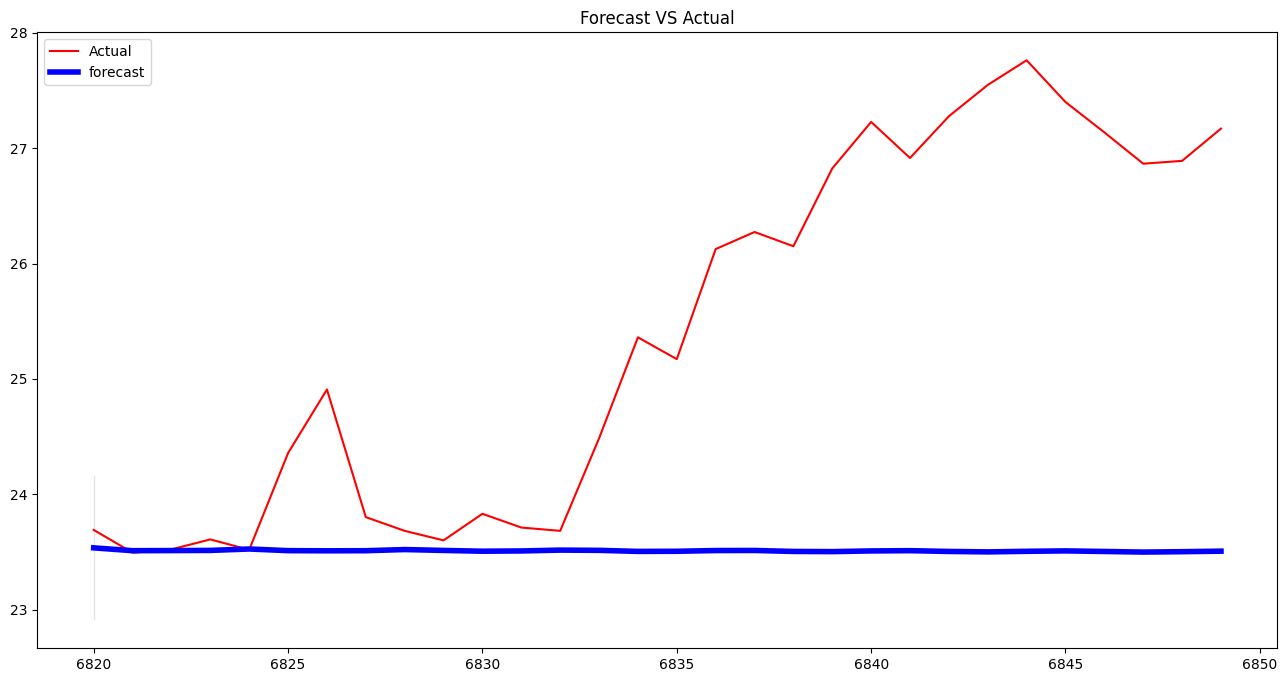

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(test[:step],label="Actual",color='red')
plt.plot(fc,label="forecast",color='blue',linewidth=4)
plt.fill_between(lower.index,lower,upper,color='k',alpha=0.1)
plt.title("Forecast VS Actual")
plt.legend(loc="upper left")
plt.show()